In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
    'python-machine-learning-book-2nd-edition'
    '/master/code/ch10/housing.data.txt',
    header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


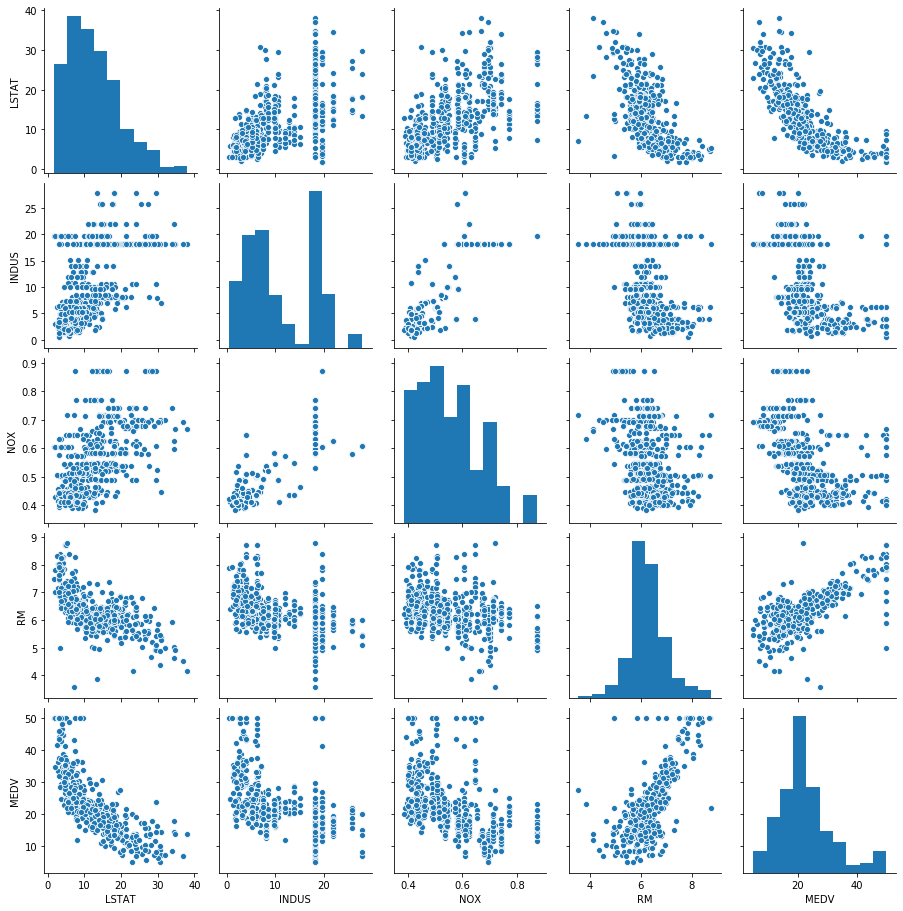

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5)
#plt.tight_layout()
#plt.show()

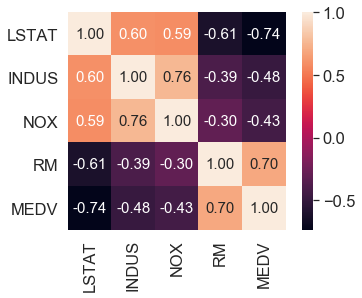

In [4]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)

In [21]:
from sklearn.preprocessing import StandardScaler
X = df[['RM']].values
y = df[['MEDV']].values

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
#y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten() use if y = df['MEDV'].values
y_std = sc_y.fit_transform(y)

# Linear Regression without SKLEARN

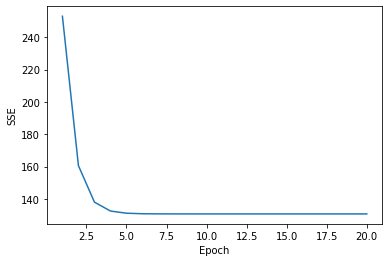

In [11]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        return self.net_input(X)
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

sns.reset_orig() # resets matplotlib style
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

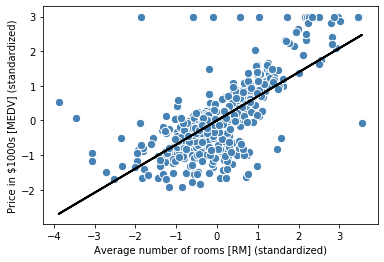

In [7]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

# Linear Regression Model Using sklearn

Slope: 9.102
Intercept: -34.671


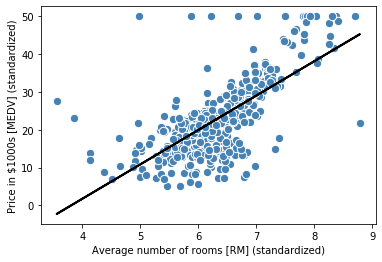

In [26]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
X = df[['RM']].values
y = df['MEDV'].values
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
plt.plot(X, slr.predict(X), color='black', lw=2)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

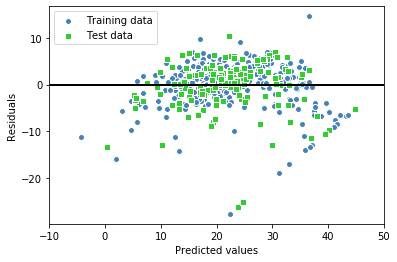

MSE train: 19.958, test: 27.196
R^2 train: 0.765, test: 0.673


In [41]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train,
    c='steelblue', marker='o', edgecolor='white',
    label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
    c='limegreen', marker='s', edgecolor='white',
    label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train, y_train_pred), 
    r2_score(y_test, y_test_pred)))

# Linear Regression Model using RANSAC

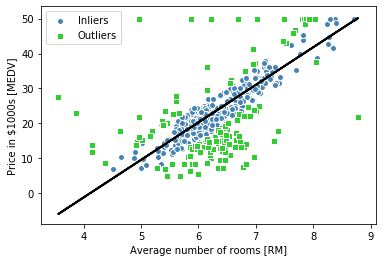

Slope: 10.735
Intercept: -44.089


In [38]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50,
                         loss='absolute_loss', residual_threshold=5.0, random_state=0)
ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], 
            c='limegreen', edgecolor='white', marker='s', label='Outliers')
plt.plot(X, ransac.predict(X), color='black', lw=2)

plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')
plt.show()
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

In [23]:
# Other Models can also be tried
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Polynomial regression

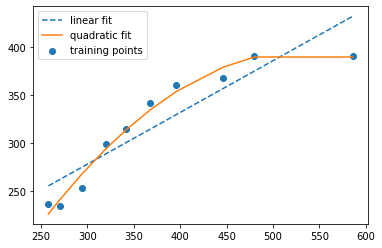

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


In [84]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array([ 258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([ 236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])
X_test = np.arange(250,600,10)[:, np.newaxis]
np.shape(X_test)

lr = LinearRegression()
lr.fit(X, y)
y_lin_pred = lr.predict(X)

qr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)
qr.fit(X_quad, y)
y_quad_fit = qr.predict(quadratic.fit_transform(X)) #y_lin_pred = lr.predict(X_test) #y_lin_pred = lr.predict(X_quad)

plt.scatter(X, y, label='training points')
plt.plot(X, y_lin_pred,  label='linear fit', linestyle='--')
plt.plot(X, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')
plt.show()

print('Training MSE linear: %.3f, quadratic: %.3f' % (
    mean_squared_error(y, y_lin_pred),
    mean_squared_error(y, y_quad_fit)))
print('Training R^2 linear: %.3f, quadratic: %.3f' % (
    r2_score(y, y_lin_pred),
    r2_score(y, y_quad_fit)))

# Modeling Nonlinear Housing dataset

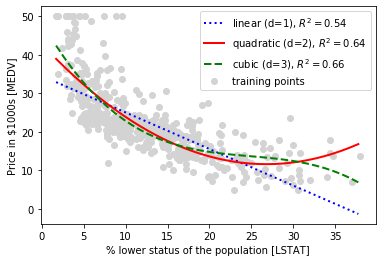

In [88]:
X = df[['LSTAT']].values
y = df['MEDV'].values
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]


regr = LinearRegression()
regr = regr.fit(X, y)
y_lin_pred = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))


# create quadratic features
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)
regr = regr.fit(X_quad, y)
y_quad_pred = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))


cubic = PolynomialFeatures(degree=3)
X_cubic = cubic.fit_transform(X)
regr = regr.fit(X_cubic, y)
y_cubic_pred = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X, y, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_pred,
    label='linear (d=1), $R^2=%.2f$' % linear_r2,
    color='blue',    lw=2,    linestyle=':')
plt.plot(X_fit, y_quad_pred,
    label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
    color='red',    lw=2,    linestyle='-')
plt.plot(X_fit, y_cubic_pred,
    label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
    color='green',    lw=2,    linestyle='--')
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')
plt.show()

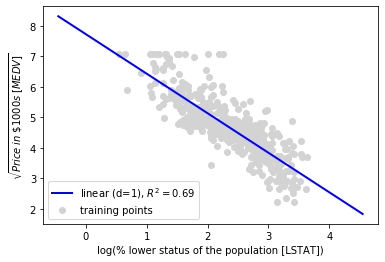

In [33]:
# transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)
# fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plot results
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1), $R^2=%.2f$' % linear_r2, color='blue', lw=2)
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')
plt.show()

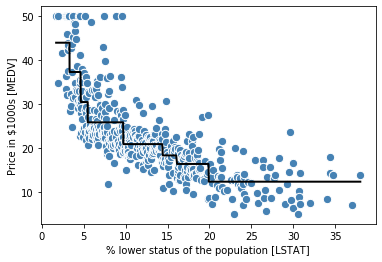

In [34]:
from sklearn.tree import DecisionTreeRegressor
X = df[['LSTAT']].values
y = df['MEDV'].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

In [35]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test =\
    train_test_split(X, y,
    test_size=0.4,
    random_state=1)
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000,
    criterion='mse',
    random_state=1,
    n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))

MSE train: 1.641, test: 11.056
R^2 train: 0.979, test: 0.878


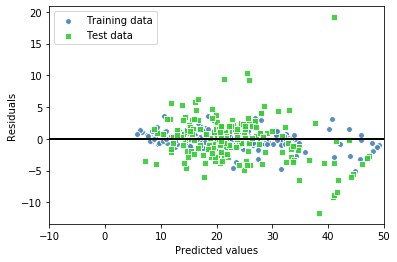

In [36]:
plt.scatter(y_train_pred,
    y_train_pred - y_train,
    c='steelblue',
    edgecolor='white',
    marker='o',
    s=35,
    alpha=0.9,
    label='Training data')
plt.scatter(y_test_pred,
    y_test_pred - y_test,
    c='limegreen',
    edgecolor='white',
    marker='s',
    s=35,
    alpha=0.9,
    label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.show()